In [106]:
import pandas as pd
import numpy as np

import tqdm
import statistics

import matplotlib.pyplot as plt

from scipy.stats import wilcoxon, spearmanr, pearsonr, mannwhitneyu

In [3]:
deadpeople = pd.read_csv('Data/MIMIC3/deadpeople.csv')
procedure = pd.read_csv('Data/MIMIC3/PROCEDUREEVENTS_MV.csv.gz')

In [4]:
deadpeople

,Unnamed: 0,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,...,comments_date,SOFA,respiration,coagulation,liver,cardiovascular,cns,renal,death,age
0,75,10069,146672,290490,carevue,CCU,CCU,57,57,2188-02-12 17:42:00,...,NaN,5,0.0,0.0,0.0,1.0,4.0,0.0,1,42
1,82,15997,169873,277496,carevue,CCU,CCU,57,57,2144-11-16 17:12:00,...,NaN,8,4.0,1.0,NaN,3.0,0.0,0.0,1,68
2,85,15170,164648,219348,carevue,CSRU,MICU,33,15,2126-02-21 15:06:00,...,NaN,7,4.0,2.0,NaN,1.0,0.0,0.0,1,65
3,88,16335,150523,245644,carevue,MICU,MICU,52,52,2154-10-03 15:43:55,...,NaN,5,1.0,0.0,NaN,1.0,0.0,3.0,1,77
4,97,19856,131068,298727,carevue,CSRU,SICU,14,23,2163-07-05 12:56:00,...,NaN,5,1.0,0.0,NaN,1.0,3.0,0.0,1,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18907,295837,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,NaN,3,NaN,0.0,0.0,1.0,2.0,0.0,1,74
18908,295838,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,NaN,3,NaN,0.0,0.0,1.0,2.0,0.0,1,74
18909,295839,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,NaN,3,NaN,0.0,0.0,1.0,2.0,0.0,1,74
18910,295840,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,NaN,3,NaN,0.0,0.0,1.0,2.0,0.0,1,74


In [5]:
procedure

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258061,257337,41958,182711,246007.0,2155-08-09 01:51:00,2155-08-10 11:20:00,225204,2009.0,min,Right Antecube,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
258062,257338,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
258063,257339,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225459,1.0,None,NaN,...,Imaging,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
258064,257340,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225966,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,1,Rewritten,NaN,RN,2155-08-09 02:20:00


In [6]:
deadpeople.subject_id.nunique()

837

In [7]:
deadpeople.hadm_id.nunique()

1529

In [8]:
procedure.HADM_ID.nunique()

21894

In [9]:
HADM_set = set(procedure.HADM_ID.values)
print(len(HADM_set))

sbj = set(procedure.SUBJECT_ID.values)
print(len(sbj))

21894
17692


In [10]:
HADM_dict = {}

for each in tqdm.tqdm(HADM_set):
    unique_procedures = procedure[procedure.HADM_ID == each].ORDERCATEGORYNAME.unique()
    HADM_dict[each] = unique_procedures

100%|███████████████████████████████████████████████████████████████████████████| 21894/21894 [00:04<00:00, 4940.40it/s]


In [11]:
len(HADM_dict)

21894

In [12]:
procedure.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME',
       'ITEMID', 'VALUE', 'VALUEUOM', 'LOCATION', 'LOCATIONCATEGORY',
       'STORETIME', 'CGID', 'ORDERID', 'LINKORDERID', 'ORDERCATEGORYNAME',
       'SECONDARYORDERCATEGORYNAME', 'ORDERCATEGORYDESCRIPTION', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE'],
      dtype='object')

In [13]:
len(HADM_dict)

21894

In [14]:
# i = 0
subject_id_list = []
up_list = []
hadm_id_list = []

for i, each in tqdm.tqdm(enumerate(list(HADM_dict.keys()))):
    sbj = procedure[procedure.HADM_ID == each].SUBJECT_ID.iloc[0]
    Hadm = procedure[procedure.HADM_ID == each].HADM_ID.iloc[0]
    up = HADM_dict[each]
    
    subject_id_list.append(sbj)
    hadm_id_list.append(Hadm)
    up_list.append(up)


21894it [00:08, 2627.22it/s]


In [15]:
procedure_ROI = pd.DataFrame(subject_id_list)

In [16]:
procedure_ROI.columns = ['SUBJECT_ID']

In [20]:
procedure_ROI

,SUBJECT_ID,HADM_ID,UniqueProcedures
0,45608,131072,"[Significant Events, Invasive Lines, Periphera..."
1,43430,131076,"[Peripheral Lines, Invasive Lines, Ventilation..."
2,53466,131078,"[Peripheral Lines, Procedures]"
3,98028,131084,"[Ventilation, Invasive Lines, Peripheral Lines..."
4,96260,131106,"[Peripheral Lines, Invasive Lines, Procedures,..."
...,...,...,...
21889,44083,131048,"[Peripheral Lines, Invasive Lines, Procedures]"
21890,27574,131050,"[Ventilation, Peripheral Lines, Invasive Lines..."
21891,59375,131051,"[Invasive Lines, Peripheral Lines, Procedures,..."
21892,62295,131054,"[Peripheral Lines, Invasive Lines, Imaging, Pr..."


In [18]:
#procedure_ROI.HADM_ID.nunique()
procedure_ROI.SUBJECT_ID.nunique()

17692

In [19]:
procedure_ROI['SUBJECT_ID'] = subject_id_list
procedure_ROI['HADM_ID'] = hadm_id_list
procedure_ROI['UniqueProcedures'] = up_list

In [21]:
df_merged = pd.merge(left=deadpeople, right=procedure_ROI, left_on="hadm_id", right_on="HADM_ID")

In [22]:
df_merged

,Unnamed: 0,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,...,coagulation,liver,cardiovascular,cns,renal,death,age,SUBJECT_ID,HADM_ID,UniqueProcedures
0,633,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
1,634,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
2,635,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
3,636,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
4,637,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17668,295837,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba..."
17669,295838,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba..."
17670,295839,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba..."
17671,295840,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba..."


In [23]:
df_merged.columns

Index(['Unnamed: 0', 'subject_id', 'hadm_id', 'icustay_id', 'dbsource',
       'first_careunit', 'last_careunit', 'first_wardid', 'last_wardid',
       'intime', 'outtime', 'los', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
       'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag', 'starttime', 'endtime', 'itemid', 'value', 'valueuom',
       'location', 'locationcategory', 'storetime', 'cgid', 'orderid',
       'linkorderid', 'ordercategoryname', 'secondaryordercategoryname',
       'ordercategorydescription', 'isopenbag', 'continueinnextdept',
       'cancelreason', 'statusdescription', 'comments_editedby',
       'comments_canceledby', 'comments_date', 'SOFA', 'respiration',
       'coagulation', 'liver', 'cardiovascular', 'cns', 'renal'

In [24]:
df_merged.language.unique()

array(['ENGL', 'SPAN', 'PTUN', 'PERS', 'RUSS', '*ARM', 'CANT', '*BUR',
       'CAPE', 'PORT', 'ITAL', nan, 'MAND', 'GREE', 'TAGA'], dtype=object)

In [26]:
#df_merged.to_csv('deadPeopleProcedures.csv', index=False)

In [27]:
df_merged

,Unnamed: 0,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,...,coagulation,liver,cardiovascular,cns,renal,death,age,SUBJECT_ID,HADM_ID,UniqueProcedures
0,633,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
1,634,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
2,635,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
3,636,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
4,637,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17668,295837,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba..."
17669,295838,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba..."
17670,295839,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba..."
17671,295840,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba..."


In [157]:
df_merged_dropped = df_merged.drop_duplicates(subset=['hadm_id'])

In [158]:
df_merged_dropped

,Unnamed: 0,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,...,cardiovascular,cns,renal,death,age,SUBJECT_ID,HADM_ID,UniqueProcedures,UniqueProceduresCleaned,NumProcedures
0,633,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas...",5
33,3859,60715,169129,204787,metavision,TSICU,TSICU,14,14,2150-10-25 23:29:07,...,2.0,0.0,0.0,1,85,60715,169129,"[Significant Events, Procedures, Communication...","[Procedures, Communication, Ventilation, Invas...",6
96,9430,63496,190949,271718,metavision,TSICU,TSICU,14,14,2156-10-23 11:48:38,...,1.0,3.0,0.0,1,48,63496,190949,"[Ventilation, Invasive Lines, Peripheral Lines...","[Procedures, Ventilation, Invasive Lines, Sign...",5
182,9516,68268,161755,291673,metavision,SICU,SICU,33,33,2157-05-24 17:14:24,...,1.0,0.0,1.0,1,71,68268,161755,"[Ventilation, Significant Events, Invasive Lin...","[Procedures, Communication, Ventilation, Invas...",6
238,9603,76896,170213,260884,metavision,SICU,SICU,57,57,2130-06-11 03:45:19,...,1.0,4.0,0.0,1,77,76896,170213,"[Ventilation, Peripheral Lines, Invasive Lines...","[Imaging, Ventilation, Invasive Lines, Procedu...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,293755,18982,100522,250157,metavision,MICU,MICU,52,52,2139-07-22 07:46:06,...,1.0,2.0,4.0,1,70,18982,100522,"[Procedures, Invasive Lines, Peripheral Lines,...","[Imaging, Invasive Lines, Procedures]",3
17520,293791,87133,176047,240340,metavision,TSICU,SICU,14,57,2156-10-02 03:11:08,...,4.0,4.0,0.0,1,64,87133,176047,"[Procedures, Imaging, Invasive Lines, Peripher...","[Procedures, Ventilation, Invasive Lines, Sign...",5
17566,293840,56583,138864,204061,metavision,MICU,MICU,52,23,2161-04-29 23:45:44,...,4.0,0.0,1.0,1,86,56583,138864,"[Procedures, Imaging, Invasive Lines, Communic...","[Procedures, Communication, Ventilation, Invas...",5
17601,294058,18982,189311,225952,metavision,MICU,MICU,52,52,2139-06-27 15:34:51,...,4.0,0.0,3.0,0,70,18982,189311,"[Ventilation, Invasive Lines, Peripheral Lines...","[Imaging, Ventilation, Invasive Lines, Procedu...",4


In [159]:
df_merged_dropped.hadm_id.nunique()

475

In [162]:
df_merged_eng = df_merged_dropped[df_merged_dropped.language == "ENGL"]
df_merged_noneng = df_merged_dropped[df_merged_dropped.language != "ENGL"]

In [166]:
len(df_merged_eng)

433

In [165]:
len(df_merged_noneng)

42

In [35]:
len_procedures = []
for i in tqdm.tqdm(range(len(df_merged_noneng))):
    up = df_merged_noneng.UniqueProcedures.iloc[i]
    len_procedures.append(len(up))

100%|████████████████████████████████████████████████████████████████████████████| 1855/1855 [00:00<00:00, 92244.25it/s]


In [36]:
df_merged_noneng['NumProcedures'] = len_procedures

/var/folders/09/qf7m7_0x0ss01r106qppmgrw0000gn/T/ipykernel_50170/2506147360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_noneng['NumProcedures'] = len_procedures


In [37]:
df_merged_noneng

,Unnamed: 0,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,...,liver,cardiovascular,cns,renal,death,age,SUBJECT_ID,HADM_ID,UniqueProcedures,NumProcedures
411,17647,63944,187913,249395,metavision,MICU,MICU,50,50,2121-07-21 04:33:16,...,2.0,1.0,1.0,4.0,1,67,63944,187913,"[Peripheral Lines, Procedures, Invasive Lines,...",9
412,17648,63944,187913,249395,metavision,MICU,MICU,50,50,2121-07-21 04:33:16,...,2.0,1.0,1.0,4.0,1,67,63944,187913,"[Peripheral Lines, Procedures, Invasive Lines,...",9
413,17649,63944,187913,249395,metavision,MICU,MICU,50,50,2121-07-21 04:33:16,...,2.0,1.0,1.0,4.0,1,67,63944,187913,"[Peripheral Lines, Procedures, Invasive Lines,...",9
414,17650,63944,187913,249395,metavision,MICU,MICU,50,50,2121-07-21 04:33:16,...,2.0,1.0,1.0,4.0,1,67,63944,187913,"[Peripheral Lines, Procedures, Invasive Lines,...",9
415,17651,63944,187913,249395,metavision,MICU,MICU,50,50,2121-07-21 04:33:16,...,2.0,1.0,1.0,4.0,1,67,63944,187913,"[Peripheral Lines, Procedures, Invasive Lines,...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17416,292008,27766,116756,209653,both,MICU,MICU,52,52,2167-04-29 15:30:23,...,3.0,1.0,NaN,2.0,1,55,27766,116756,"[Invasive Lines, Imaging, Procedures, Intubati...",7
17417,292009,27766,116756,209653,both,MICU,MICU,52,52,2167-04-29 15:30:23,...,3.0,1.0,NaN,2.0,1,55,27766,116756,"[Invasive Lines, Imaging, Procedures, Intubati...",7
17418,292010,27766,116756,209653,both,MICU,MICU,52,52,2167-04-29 15:30:23,...,3.0,1.0,NaN,2.0,1,55,27766,116756,"[Invasive Lines, Imaging, Procedures, Intubati...",7
17419,292011,27766,116756,209653,both,MICU,MICU,52,52,2167-04-29 15:30:23,...,3.0,1.0,NaN,2.0,1,55,27766,116756,"[Invasive Lines, Imaging, Procedures, Intubati...",7


In [170]:
df_merged_eng.NumProcedures.describe()

count    433.000000
mean       4.413395
std        1.893582
min        0.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        9.000000
Name: NumProcedures, dtype: float64

In [43]:
df_merged_noneng.NumProcedures.describe()

count    1855.000000
mean        7.754178
std         1.398085
min         1.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: NumProcedures, dtype: float64

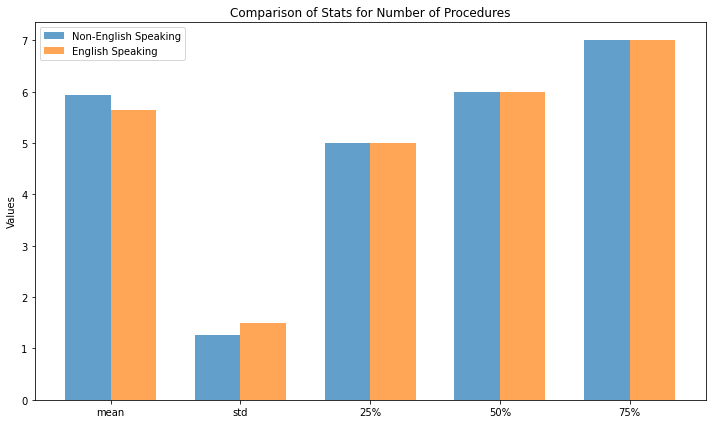

In [171]:
non_english_stats = {
    'mean': 5.942318,
    'std': 1.262869,
    '25%': 5.000000,
    '50%': 6.000000,
    '75%': 7.000000
}

# Data for English Speaking
english_stats = {
    'mean': 5.642749,
    'std': 1.486790,
    '25%': 5.000000,
    '50%': 6.000000,
    '75%': 7.000000
}

# Categories
categories = list(non_english_stats.keys())

# Values for Non-English Speaking and English Speaking
non_english_values = list(non_english_stats.values())
english_values = list(english_stats.values())

# Position of bars on x-axis
x = np.arange(len(categories))

# Width of the bars
width = 0.35

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, non_english_values, width, label='Non-English Speaking', alpha=0.7)
rects2 = ax.bar(x + width/2, english_values, width, label='English Speaking', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Comparison of Stats for Number of Procedures')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

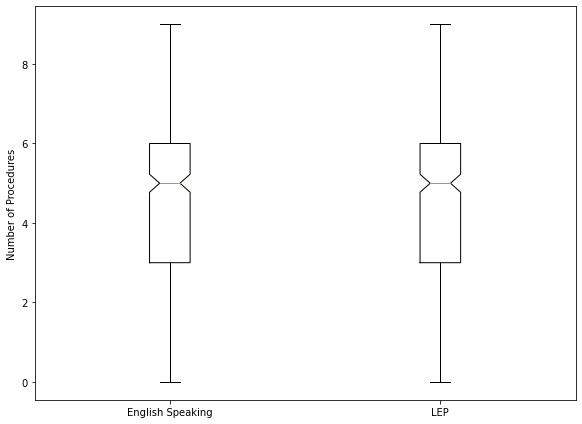

In [177]:
# Combine data for box plot
data = [df_merged_eng['NumProcedures'], df_merged_eng['NumProcedures']]
labels = ['English Speaking', 'LEP']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, notch=True)
plt.tight_layout()
plt.ylabel('Number of Procedures')
# Show the plot
plt.show()

In [46]:
median_eng = statistics.median(df_merged_eng.NumProcedures.values)
median_noneng = statistics.median(df_merged_noneng.NumProcedures.values)

In [47]:
print(f"Median of # of procedures in english speaking population: {median_eng}")
print(f"Median of # of procedures in non-english speaking population: {median_noneng}")

Median of # of procedures in english speaking population: 7.0
Median of # of procedures in non-english speaking population: 8


In [49]:
# Sample data for two related samples
english_num_procedures = np.array(df_merged_eng.NumProcedures.values)
nonenglish_num_procedures = np.array(df_merged_noneng.NumProcedures.values)

# Perform Wilcoxon signed-rank test
statistic, p_value = mannwhitneyu(english_num_procedures, nonenglish_num_procedures)

print("mannwhitneyu statistic:", statistic)
print("P-value:", p_value)

In [53]:
# Perform Wilcoxon signed-rank test
statistic, p_value = mannwhitneyu(english_num_procedures, nonenglish_num_procedures)

In [54]:
print("mannwhitneyu statistic:", statistic)
print("P-value:", p_value)

mannwhitneyu statistic: 12364053.5
P-value: 1.1147562874250825e-29


In [55]:
print(df_merged_eng.UniqueProcedures.iloc[0])
print(df_merged_eng.NumProcedures.iloc[0])

['Ventilation' 'Peripheral Lines' 'Invasive Lines' 'Procedures' 'Imaging'
 'Intubation/Extubation' 'Communication']
7


In [56]:
ventilation = ['Ventilation', 'Intubation/Extubation']

In [89]:
up_cleaned_list = []
for i in tqdm.tqdm(range(len(df_merged))):
    up_cleaned = []
    up = df_merged.UniqueProcedures.iloc[i]
    for each_ in up:
        if each_ in ventilation:
            up_cleaned.append("Ventilation")
        elif each_ == 'Peripheral Lines':
            pass
        else:
            up_cleaned.append(each_)
            
    up_cleaned_list.append(list(set(up_cleaned)))

100%|█████████████████████████████████████████████████████████████████████████| 17673/17673 [00:00<00:00, 127232.76it/s]


In [90]:
df_merged['UniqueProceduresCleaned'] = up_cleaned_list

In [91]:
df_merged

,Unnamed: 0,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,...,liver,cardiovascular,cns,renal,death,age,SUBJECT_ID,HADM_ID,UniqueProcedures,UniqueProceduresCleaned
0,633,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas..."
1,634,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas..."
2,635,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas..."
3,636,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas..."
4,637,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,0.0,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17668,295837,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba...","[Procedures, Communication, Ventilation, Invas..."
17669,295838,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba...","[Procedures, Communication, Ventilation, Invas..."
17670,295839,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba...","[Procedures, Communication, Ventilation, Invas..."
17671,295840,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,0.0,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba...","[Procedures, Communication, Ventilation, Invas..."


In [92]:
print(df_merged.UniqueProcedures.iloc[0])
print(df_merged.UniqueProceduresCleaned.iloc[0])

['Ventilation' 'Peripheral Lines' 'Invasive Lines' 'Procedures' 'Imaging'
 'Intubation/Extubation' 'Communication']
['Procedures', 'Communication', 'Ventilation', 'Invasive Lines', 'Imaging']


In [97]:
len_procedures = []
for i in tqdm.tqdm(range(len(df_merged))):
    up = df_merged.UniqueProceduresCleaned.iloc[i]
    len_procedures.append(len(up))

100%|█████████████████████████████████████████████████████████████████████████| 17673/17673 [00:00<00:00, 159909.25it/s]


In [98]:
df_merged['NumProcedures'] = len_procedures

In [99]:
df_merged

,Unnamed: 0,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,...,cardiovascular,cns,renal,death,age,SUBJECT_ID,HADM_ID,UniqueProcedures,UniqueProceduresCleaned,NumProcedures
0,633,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas...",5
1,634,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas...",5
2,635,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas...",5
3,636,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas...",5
4,637,80737,163271,280335,metavision,MICU,MICU,50,50,2192-12-03 23:51:12,...,4.0,0.0,2.0,1,53,80737,163271,"[Ventilation, Peripheral Lines, Invasive Lines...","[Procedures, Communication, Ventilation, Invas...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17668,295837,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba...","[Procedures, Communication, Ventilation, Invas...",6
17669,295838,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba...","[Procedures, Communication, Ventilation, Invas...",6
17670,295839,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba...","[Procedures, Communication, Ventilation, Invas...",6
17671,295840,86359,164038,250736,metavision,SICU,SICU,33,33,2108-03-23 17:46:39,...,1.0,2.0,0.0,1,74,86359,164038,"[Peripheral Lines, Procedures, Imaging, Intuba...","[Procedures, Communication, Ventilation, Invas...",6


In [100]:
df_merged_eng = df_merged[df_merged.language == "ENGL"]
df_merged_noneng = df_merged[df_merged.language != "ENGL"]

In [102]:
df_merged_eng.NumProcedures.describe()

count    15818.000000
mean         5.642749
std          1.486790
min          0.000000
25%          5.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: NumProcedures, dtype: float64

In [103]:
df_merged_noneng.NumProcedures.describe()

count    1855.000000
mean        5.942318
std         1.262869
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         8.000000
Name: NumProcedures, dtype: float64

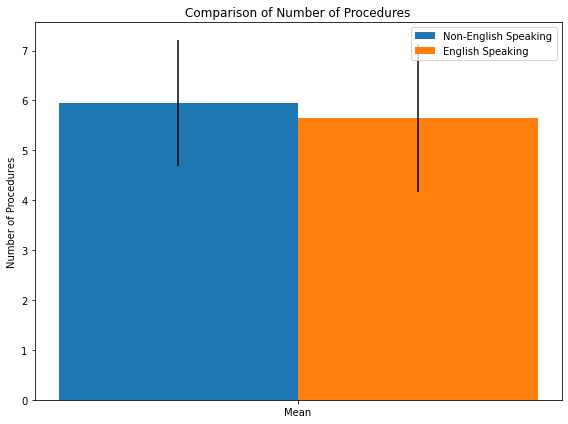

In [167]:
# Data for Non-English Speaking
non_english_mean = 5.942318
non_english_std = 1.262869

# Data for English Speaking
english_mean = 5.642749
english_std = 1.486790

# Categories
categories = ['Mean']

# Position of bars on x-axis
x = np.arange(len(categories))

# Width of the bars
width = 0.35

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, [non_english_mean], width, label='Non-English Speaking', yerr=[non_english_std])
rects2 = ax.bar(x + width/2, [english_mean], width, label='English Speaking', yerr=[english_std])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Procedures')
ax.set_title('Comparison of Number of Procedures')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [104]:
# Sample data for two related samples
english_num_procedures = np.array(df_merged_eng.NumProcedures.values)
nonenglish_num_procedures = np.array(df_merged_noneng.NumProcedures.values)

# Perform Wilcoxon signed-rank test
statistic, p_value = mannwhitneyu(english_num_procedures, nonenglish_num_procedures)

print("mannwhitneyu statistic:", statistic)
print("P-value:", p_value)

mannwhitneyu statistic: 12565355.5
P-value: 3.6417431066936553e-25


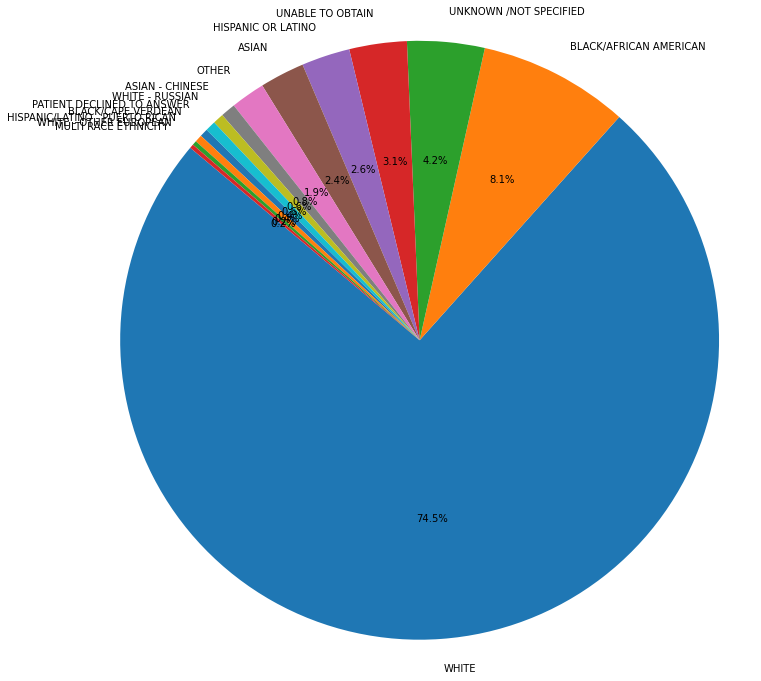

In [144]:
# Ethnicity data
ethnicities = [
    'WHITE', 'BLACK/AFRICAN AMERICAN', 'UNKNOWN /NOT SPECIFIED',
    'UNABLE TO OBTAIN', 'HISPANIC OR LATINO', 'ASIAN', 'OTHER',
    'ASIAN - CHINESE', 'WHITE - RUSSIAN', 'PATIENT DECLINED TO ANSWER',
    'BLACK/CAPE VERDEAN', 'HISPANIC/LATINO - PUERTO RICAN',
    'WHITE - OTHER EUROPEAN', 'MULTI RACE ETHNICITY'
]
counts = [4105, 447, 230, 171, 144, 133, 102, 44, 32, 31, 24, 22, 13, 12]

# Create a pie chart
plt.figure(figsize=(12, 12))
plt.pie(counts, labels=ethnicities, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.savefig('outputs/english_race.png')
plt.show()

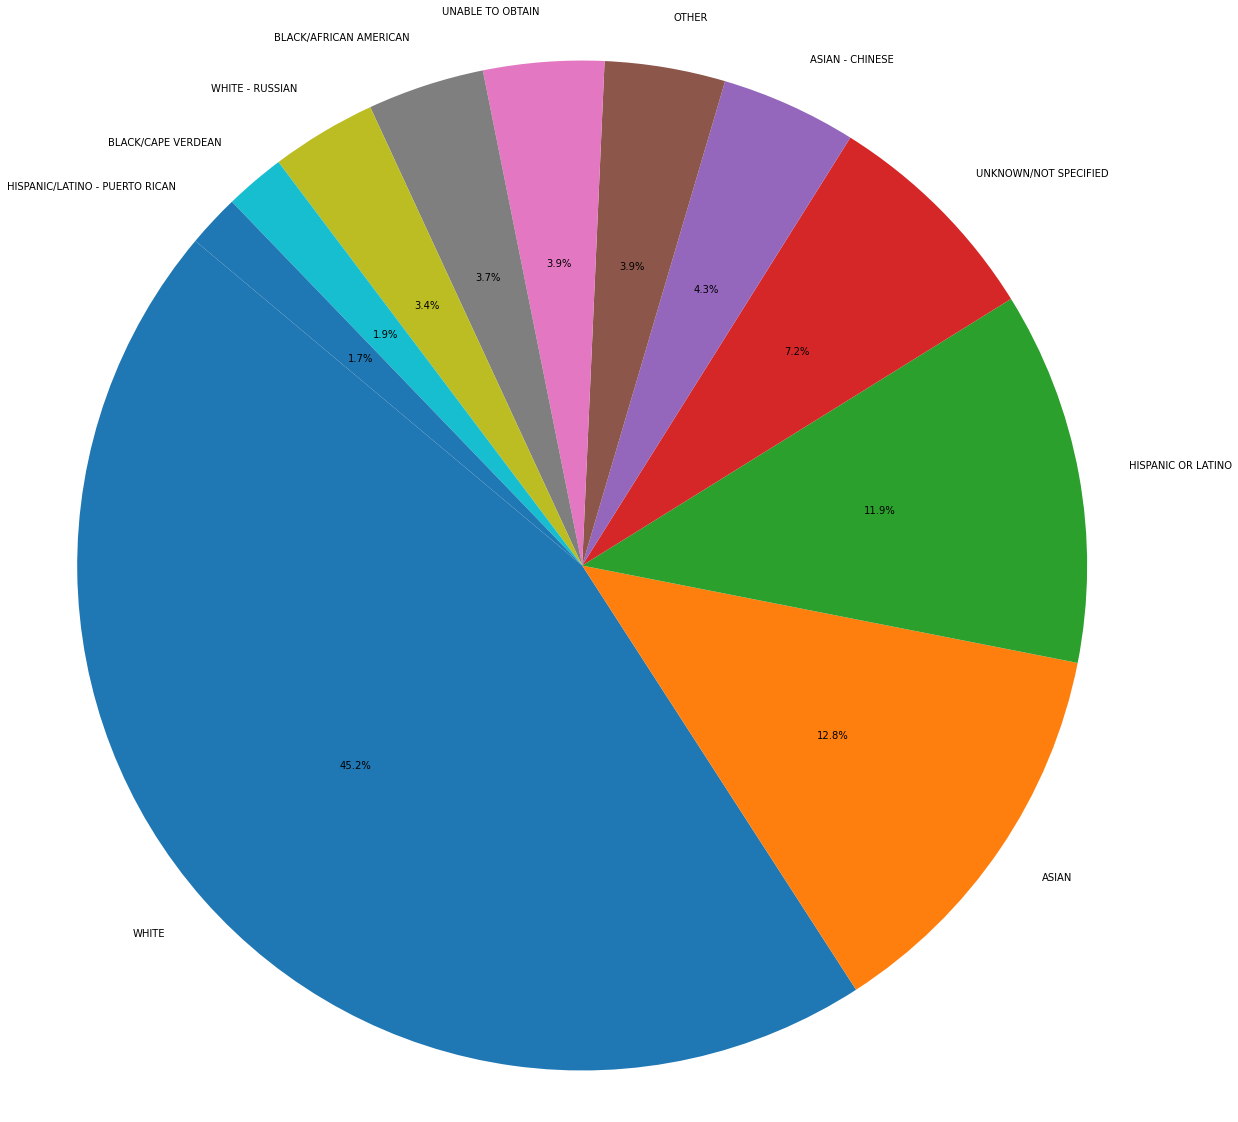

In [130]:
# Ethnicity data

# Ethnicity data
ethnicities = [
    'WHITE', 'ASIAN', 'HISPANIC OR LATINO', 'UNKNOWN/NOT SPECIFIED',
    'ASIAN - CHINESE', 'OTHER', 'UNABLE TO OBTAIN', 'BLACK/AFRICAN AMERICAN',
    'WHITE - RUSSIAN', 'BLACK/CAPE VERDEAN', 'HISPANIC/LATINO - PUERTO RICAN'
]
counts = [375, 106, 99, 60, 36, 32, 32, 31, 28, 16, 14]
# Create a pie chart
plt.figure(figsize=(20, 20))
plt.pie(counts, labels=ethnicities, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.savefig('outputs/non_english_race.png')
plt.show()

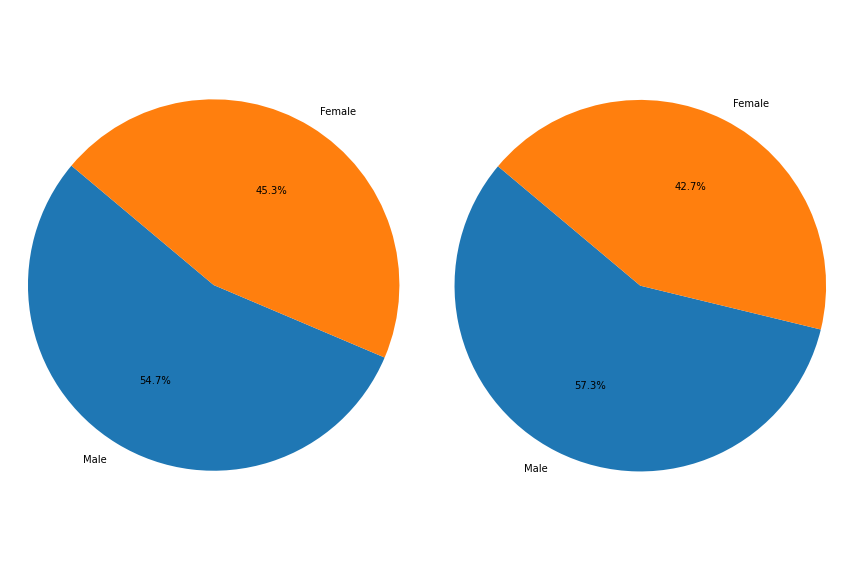

In [147]:
# Gender data
genders = ['Male', 'Female']
english_male_counts = 2582
no_english_male_counts = 509
english_female_counts = 2136
no_english_female_counts = 379

# Create subplots with two rows and one column
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Create pie chart for male distribution
axs[0].pie([english_male_counts, english_female_counts], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
#axs[0].set_title('English')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create pie chart for female distribution
axs[1].pie([no_english_male_counts, no_english_female_counts], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
#axs[1].set_title('No English')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()

# Show the subplot
plt.savefig('outputs/Gender.png')
plt.show()

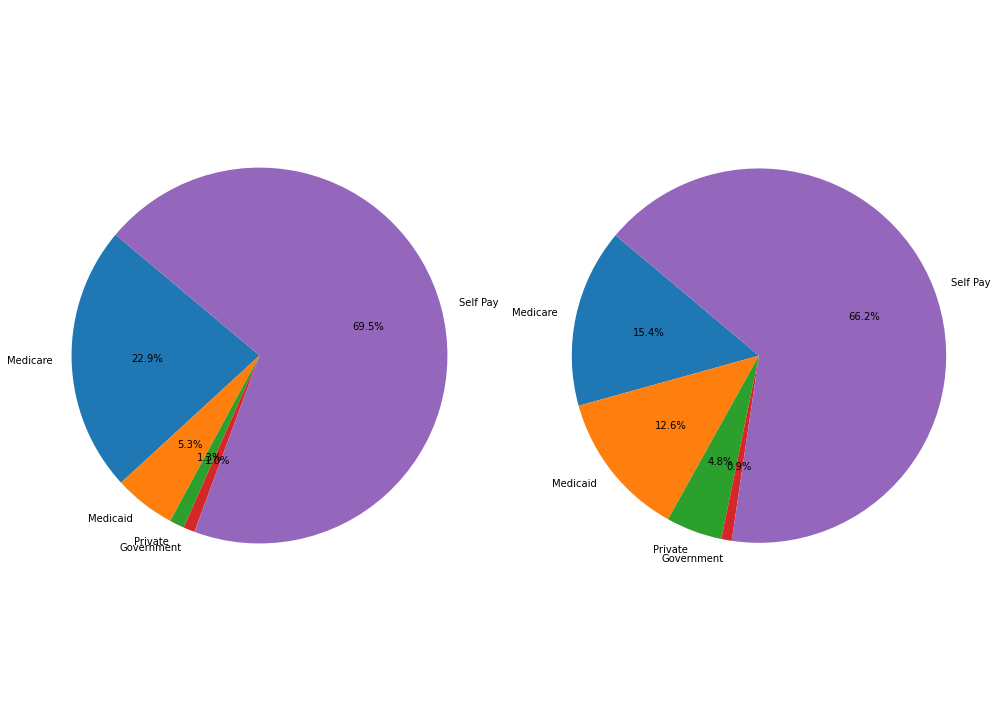

In [152]:
# Language data
language_labels = ['Medicare', 'Medicaid', 'Private', 'Government', 'Self Pay']

# Counts for No English and English speakers
no_english_counts = [137, 112, 43, 8, 588]
english_counts = [1082, 250, 60, 46, 3280]

# Create subplots with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# Create pie chart for No English speakers
axs[1].pie(no_english_counts, labels=language_labels, autopct='%1.1f%%', startangle=140)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create pie chart for English speakers
axs[0].pie(english_counts, labels=language_labels, autopct='%1.1f%%', startangle=140)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.savefig('outputs/insurance.png')
plt.show()

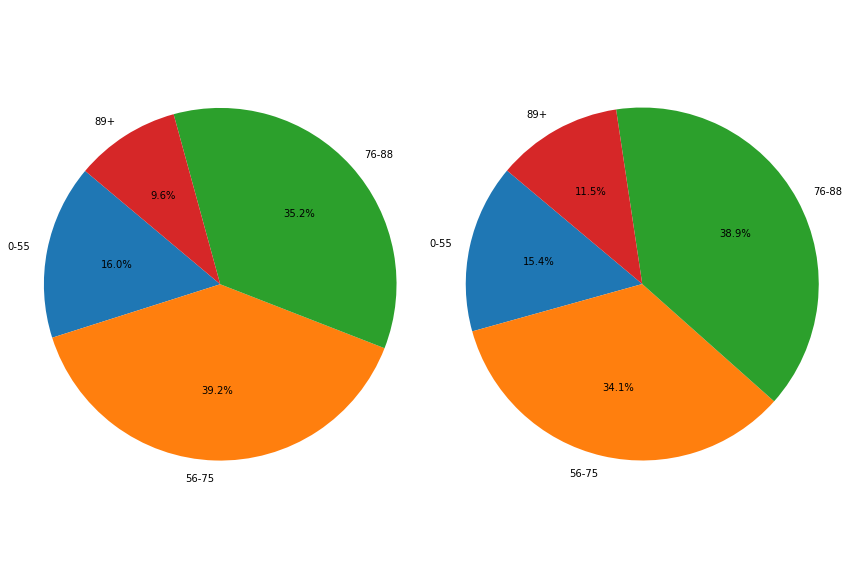

In [148]:
# Age data
age_groups = ['0-55', '56-75', '76-88', '89+']
english_counts = [740, 1811, 1625, 445]
non_english_counts = [134, 296, 338, 100]

# Create subplots with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Create pie chart for English speakers
axs[0].pie(english_counts, labels=age_groups, autopct='%1.1f%%', startangle=140)
#axs[0].set_title('Age Distribution for English Speakers')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create pie chart for Non-English speakers
axs[1].pie(non_english_counts, labels=age_groups, autopct='%1.1f%%', startangle=140)
#axs[1].set_title('Age Distribution for Non-English Speakers')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.savefig('outputs/age.png')
plt.show()
